In [14]:
ls


flowers/


To mount drive with Google Colab

In [15]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
cd /content/drive/MyDrive/Colab Notebooks/CNN

/content/drive/MyDrive/Colab Notebooks/CNN


Unzip the folder image


In [4]:
!unzip '/content/drive/MyDrive/Colab Notebooks/CNN/Flowers-Dataset.zip'

unzip:  cannot find or open /content/drive/MyDrive/Colab Notebooks/CNN/Flowers-Dataset.zip, /content/drive/MyDrive/Colab Notebooks/CNN/Flowers-Dataset.zip.zip or /content/drive/MyDrive/Colab Notebooks/CNN/Flowers-Dataset.zip.ZIP.


**Image Augmentation**

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [6]:
train_datagen = ImageDataGenerator(rescale=1./255,zoom_range=0.2,horizontal_flip=True,vertical_flip=True)

In [7]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [8]:
xtrain = train_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/CNN/flowers',target_size=(64,64),class_mode='categorical',batch_size=100)

Found 4394 images belonging to 5 classes.


In [9]:
xtest = test_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/CNN/flowers',target_size=(64,64),class_mode='categorical',batch_size=100)

Found 4394 images belonging to 5 classes.


**Create model**

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D,MaxPooling2D,Flatten,Dense

In [11]:
model = Sequential()

**Convolution layer**

In [12]:
model.add(Convolution2D(32,(3,3),activation='relu',input_shape=(64,64,3)))

Maxpooling

In [13]:
model.add(MaxPooling2D(pool_size=(2,2)))

**Flatten**

In [16]:
model.add(Flatten())

**Dense layer**

In [17]:
model.add(Dense(300,activation='relu')) #hiddenlayer 1
model.add(Dense(300,activation='relu')) #hiddenlayer 2
model.add(Dense(150,activation='relu')) #hiddenlayer 3

**Output layer**

In [18]:
model.add(Dense(5,activation='softmax'))

**Compile the model**

In [19]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [20]:
model.fit_generator(xtrain,
                    steps_per_epoch=len(xtrain),
                    epochs=10,                
                    validation_data=xtest,
                    validation_steps=len(xtest))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """


Epoch 1/10
44/44 [==============================] - 1062s 24s/step - loss: 1.4852 - accuracy: 0.3789 - val_loss: 1.2133 - val_accuracy: 0.4636
Epoch 2/10
44/44 [==============================] - 32s 744ms/step - loss: 1.1886 - accuracy: 0.4886 - val_loss: 1.1533 - val_accuracy: 0.5191
Epoch 3/10
44/44 [==============================] - 32s 744ms/step - loss: 1.0887 - accuracy: 0.5585 - val_loss: 1.1013 - val_accuracy: 0.5564
Epoch 4/10
44/44 [==============================] - 33s 754ms/step - loss: 1.0099 - accuracy: 0.5999 - val_loss: 1.0534 - val_accuracy: 0.5908
Epoch 5/10
44/44 [==============================] - 32s 745ms/step - loss: 0.9419 - accuracy: 0.6352 - val_loss: 0.9632 - val_accuracy: 0.6234
Epoch 6/10
44/44 [==============================] - 33s 750ms/step - loss: 0.9308 - accuracy: 0.6372 - val_loss: 1.0556 - val_accuracy: 0.6013
Epoch 7/10
44/44 [==============================] - 33s 755ms/step - loss: 0.8661 - accuracy: 0.6661 - val_loss: 0.8361 - val_accuracy: 0.6784

**Saving**

In [21]:
model.save('Flowers.h5')

**Testing the model**

In [22]:
import numpy as np
from tensorflow.keras.preprocessing import image

In [27]:
img = image.load_img('/content/drive/MyDrive/Colab Notebooks/CNN/flowers/sunflower/164670455_29d8e02bbd_n.jpg',target_size=(64,64))

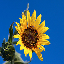

In [28]:
img

In [29]:
x = image.img_to_array(img)
x

array([[[  1.,  80., 172.],
        [  1.,  80., 172.],
        [  1.,  81., 170.],
        ...,
        [  2.,  84., 168.],
        [  3.,  83., 168.],
        [  0.,  86., 169.]],

       [[  2.,  81., 173.],
        [  2.,  81., 173.],
        [  2.,  81., 173.],
        ...,
        [  3.,  85., 169.],
        [  4.,  86., 170.],
        [  3.,  85., 169.]],

       [[  1.,  82., 171.],
        [  0.,  82., 168.],
        [  0.,  81., 172.],
        ...,
        [  3.,  85., 169.],
        [  5.,  87., 171.],
        [  3.,  85., 169.]],

       ...,

       [[  2.,  96., 194.],
        [  8.,  98., 195.],
        [  4.,  98., 196.],
        ...,
        [  5.,  93., 183.],
        [  2.,  91., 183.],
        [  5.,  92., 185.]],

       [[  4.,  98., 196.],
        [  2.,  99., 193.],
        [  7., 100., 196.],
        ...,
        [  3.,  92., 184.],
        [  2.,  93., 184.],
        [  5.,  92., 185.]],

       [[  3., 100., 197.],
        [  4.,  98., 196.],
        [ 55., 1

In [30]:
x = np.expand_dims(x,axis=0)
x

array([[[[  1.,  80., 172.],
         [  1.,  80., 172.],
         [  1.,  81., 170.],
         ...,
         [  2.,  84., 168.],
         [  3.,  83., 168.],
         [  0.,  86., 169.]],

        [[  2.,  81., 173.],
         [  2.,  81., 173.],
         [  2.,  81., 173.],
         ...,
         [  3.,  85., 169.],
         [  4.,  86., 170.],
         [  3.,  85., 169.]],

        [[  1.,  82., 171.],
         [  0.,  82., 168.],
         [  0.,  81., 172.],
         ...,
         [  3.,  85., 169.],
         [  5.,  87., 171.],
         [  3.,  85., 169.]],

        ...,

        [[  2.,  96., 194.],
         [  8.,  98., 195.],
         [  4.,  98., 196.],
         ...,
         [  5.,  93., 183.],
         [  2.,  91., 183.],
         [  5.,  92., 185.]],

        [[  4.,  98., 196.],
         [  2.,  99., 193.],
         [  7., 100., 196.],
         ...,
         [  3.,  92., 184.],
         [  2.,  93., 184.],
         [  5.,  92., 185.]],

        [[  3., 100., 197.],
       

In [31]:
model.predict(x)

array([[0., 0., 0., 1., 0.]], dtype=float32)

In [32]:
xtrain.class_indices

{'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}

In [33]:
op = ['daisy','dandelion','rose','sunflower','tulip']
pred = np.argmax(model.predict(x))
op[pred]

'sunflower'